# Korrelationen und Signifikanz

## Korrelationskoeffizient

Der Korrelationskoeffizient $\rho_{X,Y}$ zwischen zwei Zufallsvariablen $X$ und $Y$ mit dem Erwartungswert $E[X]=\mu_X$ und $\mu_Y$ und Standardabweichung $\sigma_X$ und $\sigma_Y$ ist definiert als

$$\rho_{X,Y}=\frac{ \operatorname{cov}(X,Y)}{\sigma_X \sigma_Y}=\frac{E[(X-\mu_X)(Y-\mu_Y)]}{ \sigma_X\sigma_Y}$$

Dabei bezeichnet $\operatorname{cov}(X,Y)$ die Kovarianz der Variablen $X$ und $Y$. Die Korrelation ist also die mit der Standardabweichung normierte Kovarianz. Der "normale" Korrelationskoeffizient wird auch als Pearson-Korrelation bezeichnet. Auf den Unterschied zur sogenannten Rangkorrelation (Spearman-Korrelation), gehen wir weiter unten ein.

### Beispiele Pearson-Korrelationen
Die folgenden Übungen sind in Python. In Matlab/Octave gibt es die Funktion mvnrnd(mu,Sigma,n), die der Funktionalität der Numpy-Funktion multivariate_normal entspricht. Die Matlab/Octave-Funktion corrcoef berechnet Korrelationskoeffizienten verschiedener Art.

In [7]:
%pylab inline
import scipy.stats as st
import numpy.random


Populating the interactive namespace from numpy and matplotlib


Pearson r: -1.0


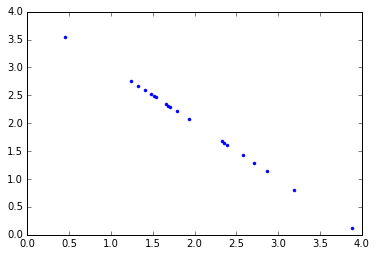

In [23]:
N=20
m1=[2, 2] # Mittelwerte
c1=[[1, -1.0], [-1.0, 1]] # Covarianz 
x1, y1 = np.random.multivariate_normal( m1, c1, N).T
plot(x1,y1,'.')
r,p=st.pearsonr(x1,y1)
print('Pearson r:',r)

Pearson r: -0.0179886687098


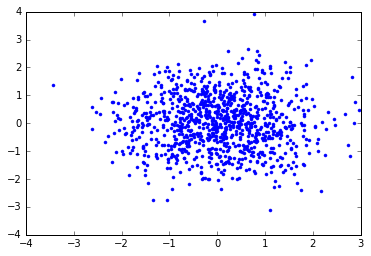

In [18]:
N=1000
m1=[0, 0] # Mittelwerte
c1=[[1, 0.0], [0.0, 1]] # Covarianz 
x1, y1 = np.random.multivariate_normal( m1, c1, N).T
plot(x1,y1,'.')
r,p=st.pearsonr(x1,y1)
print('Pearson r:',r)

Sind die Daten $X$ und $Y$ unabhängig, so ist der Korrelationskoeffizient null. Der Umkehrschluss ist aber nicht immer gültig.

## Fischer-Transformation für Signifikanztest

Ein übliches wissenschaftliches Problem ist die Bestimmung der Signifikanz einer gegebenen Korrelation, um die Hypothese eines Zusammenhangs zwischen zwei Variablen zu überprüfen.




Pearson r: -0.911666720126


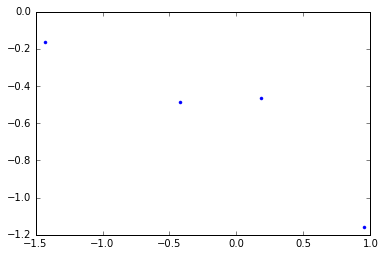

In [29]:
N=4
m1=[0, 0] # Mittelwerte
c1=[[1, 0.0], [0.0, 1]] # Covarianz 
x1, y1 = np.random.multivariate_normal( m1, c1, N).T
plot(x1,y1,'.')
r,p=st.pearsonr(x1,y1)
print('Pearson r:',r)

Im Beispiel oben beträgt die Korrelation -0.91, ein Wert vom Betrag her nahe bei eins. Ist dieser Wert signifikant? Das Ergebnis ist rein zufällig aufgetreten. Die Signifikanz hängt offensichtlich von der Anzahl der Realisationen $N$ ab.


Um die Signifikanz zu testen führen wir eine besondere Transformation ein, die sogenannte z-Transformation nach Fischer

$$z={1 \over 2}\ln\left({{1+\rho} \over {1-\rho}}\right)=\operatorname{arctanh}(r)$$



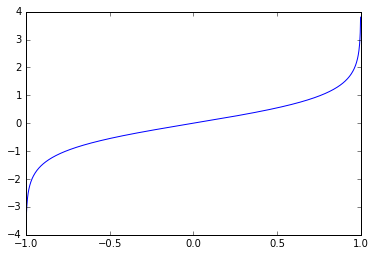

In [41]:
r=linspace(-0.999,0.999,1000)
z=arctanh(r)
plot(r,z)

Wenn $X$ und $Y$ unabhängig und bivariat normalverteilt sind, so ist $z$ nahezu (für $N>10$) normalverteilt mit dem Standardfehler

$$\frac{1}{\sqrt{N-3}}$$


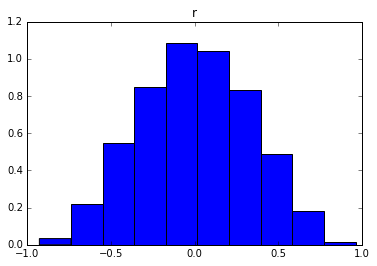

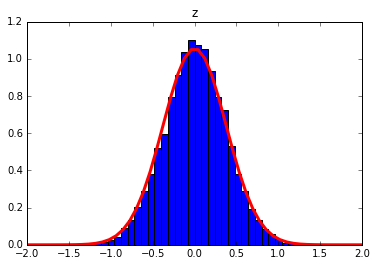

In [114]:
# Monte-Carlo Test
M=10000 # Wiederhole M mal und berechne Korrelationskoeffizienten
N=10
m1=[0, 0] # Mittelwerte
c1=[[1, 0.0], [0.0, 1]] # Kovarianz 
R=[]
for i in range(M):
    x1, y1 = np.random.multivariate_normal( m1, c1, N).T
    r,p=st.pearsonr(x1,y1)
    R.append(r)
R=array(R)

figure()
h=hist(R,normed=True)
title('r')
Z=arctanh(R)
figure()
title('z')

h=hist(Z,bins=50,range=[-2,2],normed=True)
r=linspace(-2,2)
y=st.norm.pdf(r,0,1.0/sqrt(N-3))
plot(r,y,'r-',linewidth=3)

Die z-Transformation und ihre Inverse

$$r = {{\exp(2z)-1} \over {\exp(2z)+1}} = \operatorname{tanh}(z)$$

kann nun mittels der bekannten Theorie über Normalverteilungen bzw. mit einem t-Test in Wahrscheinlichkeiten bzw. Signifikanz überführt werden.


## Signifikanztest für Korrelation

Pearson r: 0.056988830339 0.875741016876


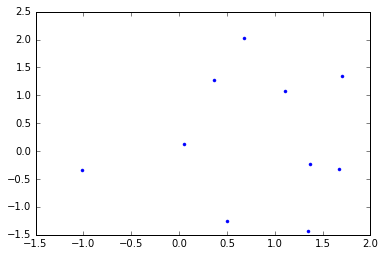

In [167]:
N=10
m1=[0, 0] # Mittelwerte
c1=[[1, 0.02], [0.02, 1]] # Covarianz 
x1, y1 = np.random.multivariate_normal( m1, c1, N).T
plot(x1,y1,'.')
r,p=st.pearsonr(x1,y1)
print('Pearson r:',r,p)

In [169]:
t=abs(r)*sqrt( (N-2)/(1-r**2)) 
p=2*st.t.cdf( -t,N-2 )
print(p)

0.875741016876


Der Wert r=0.05 (N=10) besagt, dass es wahrscheinlich bis sehr wahrscheinlich ist (p=0.87), dass die Daten unabhängig sind.



Pearson r: 0.926195060408 0.000118666253853


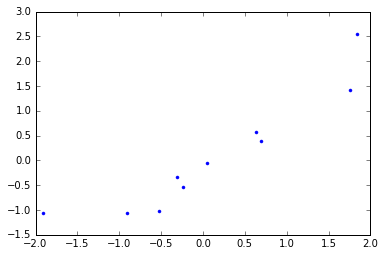

In [175]:
N=10
m1=[0, 0] # Mittelwerte
c1=[[1, 0.9], [0.9, 1]] # Covarianz 
x1, y1 = np.random.multivariate_normal( m1, c1, N).T
plot(x1,y1,'.')
r,p=st.pearsonr(x1,y1)
print('Pearson r:',r,p)

Der Wert r=0.92 (N=10) besagt, dass es praktisch sicher ist (p=0.001), dass die Daten abhängig sind.

Pearson r: 0.201209343088 5.77750469266e-06


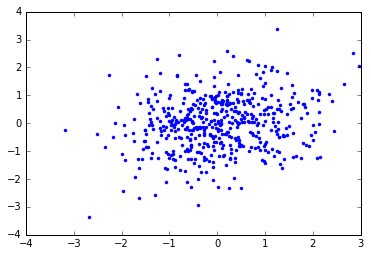

In [180]:
N=500
m1=[0, 0] # Mittelwerte
c1=[[1, 0.1], [0.1, 1]] # Covarianz 
x1, y1 = np.random.multivariate_normal( m1, c1, N).T
plot(x1,y1,'.')
r,p=st.pearsonr(x1,y1)
print('Pearson r:',r,p)

Der Wert r=0.2 (N=500) besagt, dass es praktisch sicher ist (p=0.001), dass die Daten abhängig sind.

# Rangkorrelationskoeffizient (Spearman)

## Nichtlineare Zusammenhänge  und Ausreißer

Ausreißer in den Daten oder nichtlineare Zusammenhänge beeinflussen den Korrelationskoeffizient. Der Rangkorrelationskoeffizient ist robust gegenüber Ausreißern.

Bei der Rangkorrelation werden die Daten in Ränge konvertiert, also der Größe nach geordnet und durchnummeriert, bevor der Korrelationskoeffizient berechnet wird. 

https://de.wikipedia.org/wiki/Rangkorrelationskoeffizient

### Beispiel Datenausreißer

Pearson r,p
-0.122371108693 0.213646687614
Spearman r,p
0.45235330707 1.26957197399e-06


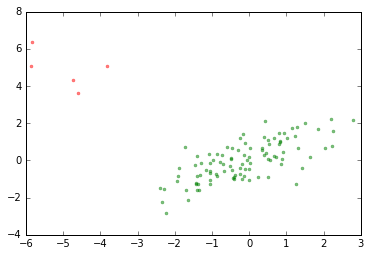

In [188]:
N=10
m1=[0, 0]
c1=[[1, 0.7], [0.7, 1]]
x1, y1 = np.random.multivariate_normal( m1, c1, 100).T

m1=[-5, 5]
c1=[[1, -0.5], [-0.5, 1]]
x2, y2 = np.random.multivariate_normal( m1, c1, 5).T

x=concatenate((x1,x2))
y=concatenate((y1,y2))

plot(x1,y1,'g.',alpha=0.5)
plot(x2,y2,'r.',alpha=0.5)

r,p=st.pearsonr(x,y)
print('Pearson r,p')
print(r,p)
print('Spearman r,p')
r,p=st.spearmanr(x,y)
print(r,p)

Obiges Beispiel zeigt, der lineare Korrelationskoeffizient (Pearson) zeigt eine nicht eindeutig signifikante Antikorrelation an. Die Rangkorrelation deutet darauf hin, dass ein Zusammenhang praktisch sicher ist.

### Beispiel nichtlinearer Zusammenhang

Pearson r,p
0.873591743256 5.44603325806e-34
Spearman r,p
1.0 0.0


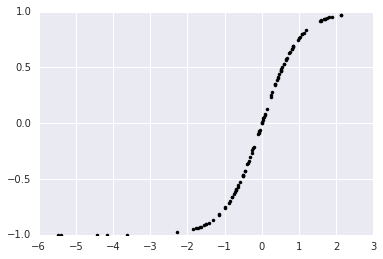

In [191]:
y=tanh(x)
plot(x,y,'k.')
r,p=st.pearsonr(x,y)
print('Pearson r,p')
print(r,p)
print('Spearman r,p')
r,p=st.spearmanr(x,y)
print(r,p)

Gibt es einen streng monotonen Zusammenhang zwischen $X$ und $Y$, so liefert die Spearman-Korrelation den Wert 1.

# Clusteranalyse

https://de.wikipedia.org/wiki/Hierarchische_Clusteranalyse

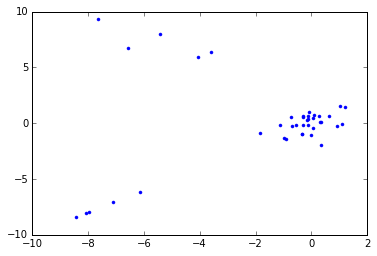

In [225]:
m1=[0, 0]
c1=[[1, 0.7], [0.7, 1]]
x1, y1 = np.random.multivariate_normal( m1, c1, 30).T


m1=[-5, 7]
c1=[[1, -0.5], [-0.5, 1]]
x2, y2 = np.random.multivariate_normal( m1, c1, 5).T

m1=[-8, -8]
c1=[[1, -0.5], [-0.5, 1]]
x3, y3 = np.random.multivariate_normal( m1, c1, 5).T


x=concatenate((x1,x2,x3))
y=concatenate((y1,y2,x3))

plot(x,y,'.')

X=array([x,y]).T

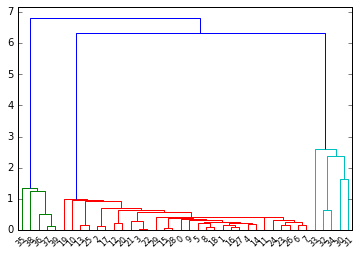

In [226]:
z=scipy.cluster.hierarchy.linkage(X)
d=scipy.cluster.hierarchy.dendrogram(z)